In [1]:
set.seed(101)
n = 500
beta =c(5, -0.5)
varx=1.5
vare=10
tr_prop<-0.5


In [2]:

# a) ###generate the training data
x2 = rnorm(n=n, mean=0, sd=varx**0.5)
x1<-rep(1,n)
x = cbind(x1, x2)

emp = rnorm(n=n, mean=0, sd=vare**0.5)

y = x%*%beta + emp
############make into dataframe###################
data<-cbind(y,x)
train_ind <- sample(seq_len(nrow(data)), size = tr_prop*n)
data_training<- data[train_ind, ]
data_test <-data[-train_ind, ]
x2_train<-data_training[,3]
y_train<-data_training[,1]
x2_test<-data_test[,3]
y_test<-as.vector(data_test[,1])



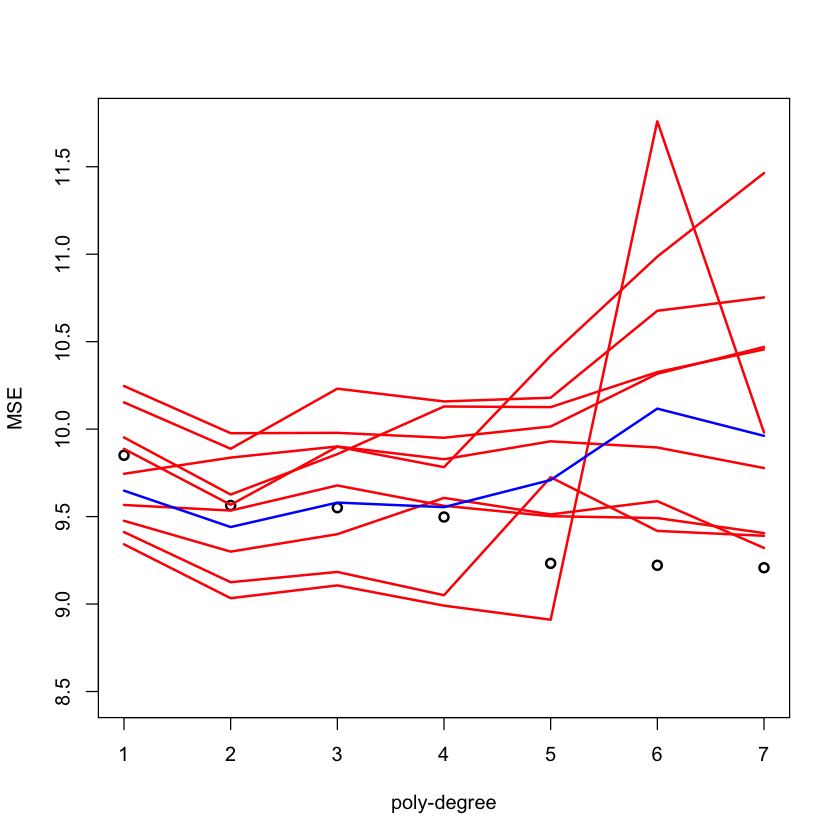

In [3]:
########################################################
###calculate the error for the different polynomials####

x_train_ = matrix(data=rep(1, tr_prop*n), nrow=tr_prop*n, ncol=1)
x_test_ = matrix(data=rep(1, length(y_test)), nrow=length(y_test), ncol=1)
sim_rep=10
poly_degree<-6
mse_test_result = matrix(nrow = sim_rep, ncol = poly_degree + 1)
mse_train_result = matrix(nrow = sim_rep, ncol = poly_degree + 1)


for(sim in 1:sim_rep)
{
  data<-cbind(y,x)
  train_ind <- sample(seq_len(nrow(data)), size = tr_prop*n)
  data_training<- data[train_ind, ]
  data_test <-data[-train_ind, ]
  x2_train<-data_training[,3]
  y_train<-data_training[,1]
  x2_test<-data_test[,3]
  y_test<-as.vector(data_test[,1])
  
  ########################################################
  ###calculate the error for the different polynomials####
  
  x_train_ = matrix(data=rep(1, tr_prop*n), nrow=tr_prop*n, ncol=1)
  x_test_ = matrix(data=rep(1, length(y_test)), nrow=length(y_test), ncol=1)
  for (i in 0:poly_degree) {
    if (i > 0){
      x_train_ = cbind(x_train_, x2_train**i)
      x_test_ = cbind(x_test_, x2_test**i)
    }
    b_train = solve(t(x_train_)%*%x_train_)%*%(t(x_train_)%*%y_train)
    y_train_hat = x_train_%*%b_train
    mse_train = mean((y_train - y_train_hat)**2)
    y_test_hat = x_test_%*%b_train
    mse_test = mean((y_test - y_test_hat)**2)
    mse_train_result[sim,i + 1] = mean((y_train - y_train_hat)**2)
    mse_test_result[sim,i + 1]  = mean((y_test - y_test_hat)**2)
  }
}



plot(mse_train_result[1,],ylim=c(min(mse_test_result),max(mse_test_result)),ylab="MSE",xlab="poly-degree",lwd=2)
for(i in 2:sim_rep)
{
  lines(mse_test_result[i,],col="red",lwd=2)
}

mean_test<-colMeans(mse_test_result)
lines(mean_test,col="blue",lwd=2)
